# fittlyf's Data Science Internship Entrance Test

## Part - 1

### Author : Jawahar R

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [281]:
fico = pd.read_csv('C:\\Users\\jawah\\Dropbox\\My PC (LAPTOP-VFH8S4EU)\\Downloads\\fitlyf\\fico.csv')
fico.head()

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796


In [282]:
fico.info()
fico.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100013 entries, 0 to 100012
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100013 non-null  int64 
 1   FICO     70398 non-null   object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


,acct_id
count,100013.000000
mean,49996.449842
std,28868.457180
min,1.000000
25%,24999.000000
50%,49994.000000
75%,74997.000000
max,100000.000000


In [283]:
fico.nunique()

acct_id    100000
FICO          377
dtype: int64

### Duplicate values detection and treatment

In [284]:
#duplicate value
fico['acct_id'].duplicated().sum()

13

In [285]:
fico.loc[fico['acct_id'].duplicated(),:]

,acct_id,FICO
140,140,752
190,189,745
192,190,828
194,191,752
196,192,850
30506,30501,773
30508,30502,798
30510,30503,820
30512,30504,NaN
30514,30505,820


In [286]:
fico[fico['acct_id']==140]

,acct_id,FICO
139,140,752
140,140,752


In [287]:
fico.drop_duplicates(inplace=True)

In [288]:
fico[fico['acct_id']==140]

,acct_id,FICO
139,140,752


In [289]:
fico.count()

acct_id    100000
FICO        70388
dtype: int64

### Erroneous values detection and treatment

In [290]:
fico['FICO'].unique()

array(['768', '850', '677', '843', '796', '669', '805', '838', nan, '794',
       '832', '777', '809', '793', '746', '781', '812', '811', '849',
       '820', '778', '848', '821', '534', '844', '788', '696', '829',
       '740', '786', '802', '782', '816', '806', '828', '729', '751',
       '764', '808', '792', '831', '824', '727', '836', '775', '765',
       '735', '767', '839', '833', '807', '769', '715', '745', '803',
       '799', '847', '672', '823', '776', '797', '724', '845', '841',
       '693', '717', '754', '779', '565', '830', 'AA', '743', '825',
       '752', '770', '800', '772', '759', '670', '826', '570', '790',
       '817', '711', '678', '725', '842', '827', '710', '819', '700',
       '822', '623', '771', '705', '627', '835', '742', '655', '834',
       '762', '749', '753', '712', '798', '750', '837', '784', '737',
       '814', '748', '739', '686', '633', '671', '684', '552', '783',
       '756', '734', '703', '719', '720', '687', '801', '697', '553',
       '721', '7

In [291]:
fico['FICO']=pd.to_numeric(fico['FICO'], errors='coerce', downcast='integer')

In [292]:
fico['FICO'].unique()

array([768., 850., 677., 843., 796., 669., 805., 838.,  nan, 794., 832.,
       777., 809., 793., 746., 781., 812., 811., 849., 820., 778., 848.,
       821., 534., 844., 788., 696., 829., 740., 786., 802., 782., 816.,
       806., 828., 729., 751., 764., 808., 792., 831., 824., 727., 836.,
       775., 765., 735., 767., 839., 833., 807., 769., 715., 745., 803.,
       799., 847., 672., 823., 776., 797., 724., 845., 841., 693., 717.,
       754., 779., 565., 830., 743., 825., 752., 770., 800., 772., 759.,
       670., 826., 570., 790., 817., 711., 678., 725., 842., 827., 710.,
       819., 700., 822., 623., 771., 705., 627., 835., 742., 655., 834.,
       762., 749., 753., 712., 798., 750., 837., 784., 737., 814., 748.,
       739., 686., 633., 671., 684., 552., 783., 756., 734., 703., 719.,
       720., 687., 801., 697., 553., 721., 728., 722., 818., 716., 780.,
       695., 708., 726., 709., 585., 795., 804., 682., 652., 785., 713.,
       744., 732., 675., 815., 761., 699., 813., 78

In [293]:
fico.head()

,acct_id,FICO
0,1,768.0
1,2,850.0
2,3,677.0
3,4,843.0
4,5,796.0


### Missing values detection and treatment

In [294]:
#missing value detection
missing_values = fico.isna().sum()
missing_values_percentage = fico.isna().sum()/fico.isna().count()*100
missings = pd.concat([missing_values,missing_values_percentage], axis=1,keys=['Total', '%'])
missings

,Total,%
acct_id,0,0.000
FICO,29614,29.614


In [295]:
fico.fillna('Missing', inplace=True)

In [296]:
#missing value detection
missing_values = fico.isna().sum()
missing_values_percentage = fico.isna().sum()/fico.isna().count()*100
missings = pd.concat([missing_values,missing_values_percentage], axis=1,keys=['Total', '%'])
missings

,Total,%
acct_id,0,0.0
FICO,0,0.0


### Segmenting based on fico score

FICO credit scores are a method of quantifying and evaluating an individual’s creditworthiness.

The scores range from 300 to 850

800 to 850 ----> Excellent

740 to 799 ----> Very Good

670 to 739 ----> Good

580 to 669 ----> Average

300 to 579 ----> Poor

This is the ideal way to grouping the credit scores. 

In [297]:
fico_1=fico.drop(fico[fico['FICO']=='Missing'].index, axis=0)

In [298]:
fico_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70386 entries, 0 to 100004
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   acct_id  70386 non-null  int64 
 1   FICO     70386 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


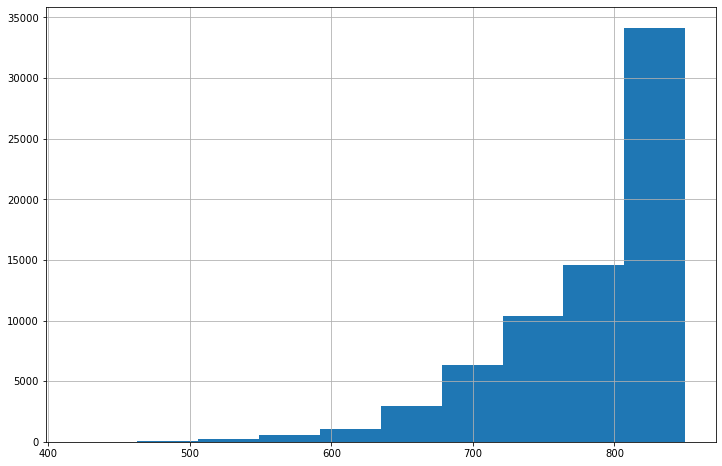

In [299]:
plt.figure(figsize=(12,8))
fico_1['FICO'].hist()
plt.show()

In [300]:
#bucketisation
bins = [300, 580, 670, 740, 800, 850]
labels = ['Poor','Average','Good','Very Good','Excellent']
fico_1['Buckets'] = pd.cut(fico_1['FICO'], bins=bins, labels=labels)
fico_1.head()

,acct_id,FICO,Buckets
0,1,768.0,Very Good
1,2,850.0,Excellent
2,3,677.0,Good
3,4,843.0,Excellent
4,5,796.0,Very Good


In [301]:
Bucket_counts=fico_1['Buckets'].value_counts()
Bucket_counts_percentage = fico_1['Buckets'].value_counts()/fico_1['Buckets'].count()*100
bucket = pd.concat([Bucket_counts,Bucket_counts_percentage], axis=1,keys=['No of Customers', 'Percentage'])
bucket

,No of Customers,Percentage
Excellent,36583,51.974825
Very Good,18418,26.167136
Good,11117,15.794334
Average,3505,4.979683
Poor,763,1.084022


In [302]:
fico['Buckets'] = fico_1['Buckets']

### Distribution of fico scores

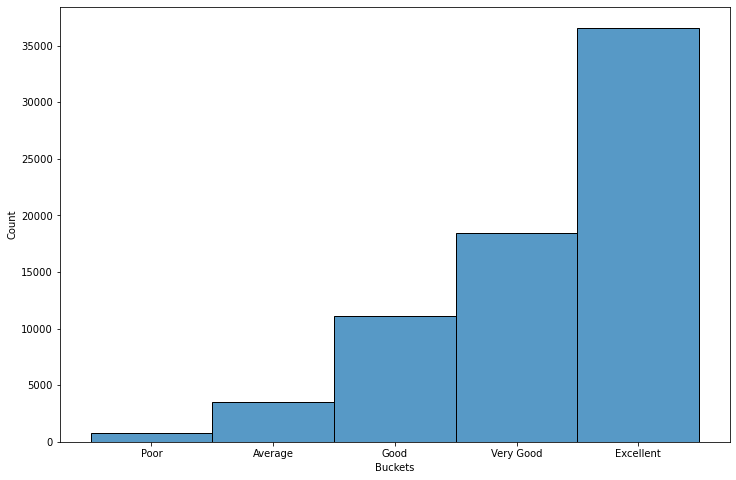

In [303]:
plt.figure(figsize=(12,8))
sns.histplot(fico_1['Buckets'])
plt.show()

we can clearly understand from above dataframe and histogram that only 1 % of people having poor fico score, 5 % of people  having average fico score, and majority of the people lies under good, very good and excellent. Especially more than 50 % of people having excellent fico score.

But in todays world, its not happening that the majority of people having excellent credit score. Even developed countries like America having only a 22 % of people with exellent credit score. In our country, percentage of excellent cibil score will be very low compared to developed countries. The majority of people falls under good, average and poor cibil score only.

### importing region 

In [304]:
region = pd.read_csv('C:\\Users\\jawah\\Dropbox\\My PC (LAPTOP-VFH8S4EU)\\Downloads\\fitlyf\\region.csv')
region.head()

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia


In [305]:
region.info()
region.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100173 entries, 0 to 100172
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100173 non-null  int64 
 1   region   100173 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


,acct_id
count,100173.000000
mean,49992.053048
std,28865.577787
min,1.000000
25%,24992.000000
50%,49981.000000
75%,74988.000000
max,100000.000000


In [306]:
#duplicates checking
region['acct_id'].duplicated().sum()

173

In [307]:
region.loc[region['acct_id'].duplicated(),:]

,acct_id,region
27,27,Los Angeles
28,27,Dallas
2577,2575,Dallas
2578,2575,Los Angeles
5015,5011,Dallas
...,...,...
97547,97379,Los Angeles
97813,97644,Los Angeles
97831,97661,Los Angeles
98464,98293,Los Angeles


In [308]:
region[region['acct_id']==27]

,acct_id,region
26,27,Los Angeles
27,27,Los Angeles
28,27,Dallas


In [309]:
region.drop_duplicates(inplace=True)

In [310]:
region.duplicated().sum()

0

In [311]:
region[region['acct_id']==27]

,acct_id,region
26,27,Los Angeles
28,27,Dallas


There is something wrong with this data. Its having a different regions for same customer id's. In reality, its not possible

In [312]:
region.count()

acct_id    100124
region     100124
dtype: int64

In [313]:
region.loc[region['acct_id'].duplicated(),:]

,acct_id,region
28,27,Dallas
2577,2575,Dallas
5015,5011,Dallas
5743,5737,Dallas
6299,6291,Dallas
...,...,...
97547,97379,Los Angeles
97813,97644,Los Angeles
97831,97661,Los Angeles
98464,98293,Los Angeles


In [314]:
region.drop(region.loc[region['acct_id'].duplicated(),:].index, inplace=True)
region.count()

acct_id    100000
region     100000
dtype: int64

In [315]:
region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100172
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   acct_id  100000 non-null  int64 
 1   region   100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [316]:
region['region'].unique()

array(['New York', 'Dallas', 'Los Angeles', 'Chicago', 'Philadelphia',
       'San Antonio', 'Houston', 'Charlotte', 'Phoenix', 'San Diego'],
      dtype=object)

In [317]:
#missing value detection
missing_values = region.isna().sum()
missing_values_percentage = region.isna().sum()/region.isna().count()*100
missings = pd.concat([missing_values,missing_values_percentage], axis=1,keys=['Total', '%'])
missings

,Total,%
acct_id,0,0.0
region,0,0.0


### Merging the fico and region

In [319]:
fico_region = pd.concat([fico, region],axis=1,join='inner')
fico_region.head()

,acct_id,FICO,Buckets,acct_id,region
0,1,768.0,Very Good,1,New York
1,2,850.0,Excellent,2,Dallas
2,3,677.0,Good,3,Los Angeles
3,4,843.0,Excellent,4,Chicago
4,5,796.0,Very Good,5,Philadelphia


In [321]:
fico_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99827 entries, 0 to 100012
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   acct_id  99827 non-null  int64   
 1   FICO     99827 non-null  object  
 2   Buckets  70245 non-null  category
 3   acct_id  99827 non-null  int64   
 4   region   99827 non-null  object  
dtypes: category(1), int64(2), object(2)
memory usage: 3.9+ MB


In [322]:
#missing value detection
#missing value detection
missing_values = fico_region.isna().sum()
missing_values_percentage = fico_region.isna().sum()/fico_region.isna().count()*100
missings = pd.concat([missing_values,missing_values_percentage], axis=1,keys=['Total', '%'])
missings

,Total,%
acct_id,0,0.000000
FICO,0,0.000000
Buckets,29582,29.633266
acct_id,0,0.000000
region,0,0.000000


I'm considering second highest as Very good and lowest average as average

In [323]:
fico_region['Buckets'] = fico_region['Buckets'].astype('object')

In [324]:
fico_region.Buckets = fico_region['Buckets'].fillna('Missing')

In [325]:
#missing value detection
#missing value detection
missing_values = fico_region.isna().sum()
missing_values_percentage = fico_region.isna().sum()/fico_region.isna().count()*100
missings = pd.concat([missing_values,missing_values_percentage], axis=1,keys=['Total', '%'])
missings

,Total,%
acct_id,0,0.0
FICO,0,0.0
Buckets,0,0.0
acct_id,0,0.0
region,0,0.0


In [326]:
second_highest = fico_region[fico_region['Buckets'] == 'Very Good']
Average = fico_region[fico_region['Buckets'] == 'Average']

In [327]:
second_highest[['region']].value_counts()

region      
Phoenix         1881
San Antonio     1877
Chicago         1875
New York        1868
Dallas          1846
Philadelphia    1835
Houston         1822
Charlotte       1807
San Diego       1803
Los Angeles     1763
dtype: int64

In [328]:
phoenix = second_highest[second_highest['region']=='Phoenix']
San_Antonio = second_highest[second_highest['region']=='San Antonio']
Chicago = second_highest[second_highest['region']=='Chicago']
New_York = second_highest[second_highest['region']=='New York']
Dallas = second_highest[second_highest['region']=='Dallas']
Philadelphia = second_highest[second_highest['region']=='Philadelphia']
Houston = second_highest[second_highest['region']=='Houston']
Charlotte = second_highest[second_highest['region']=='Charlotte']
San_Diego = second_highest[second_highest['region']=='San Diego']
Los_Angeles = second_highest[second_highest['region']=='Los Angeles']

second_highest.loc[second_highest.region == 'Phoenix', 'Average fico score'] = np.average(phoenix['FICO'])
second_highest.loc[second_highest.region == 'San Antonio', 'Average fico score'] = np.average(San_Antonio['FICO'])
second_highest.loc[second_highest.region == 'Chicago', 'Average fico score'] = np.average(Chicago['FICO'])
second_highest.loc[second_highest.region == 'New York', 'Average fico score'] = np.average(New_York['FICO'])
second_highest.loc[second_highest.region == 'Dallas', 'Average fico score'] = np.average(Dallas['FICO'])
second_highest.loc[second_highest.region == 'Philadelphia', 'Average fico score'] = np.average(Philadelphia['FICO'])
second_highest.loc[second_highest.region == 'Houston', 'Average fico score'] = np.average(Houston['FICO'])
second_highest.loc[second_highest.region == 'Charlotte', 'Average fico score'] = np.average(Charlotte['FICO'])
second_highest.loc[second_highest.region == 'San Diego', 'Average fico score'] = np.average(San_Diego['FICO'])
second_highest.loc[second_highest.region == 'Los Angeles', 'Average fico score'] = np.average(Los_Angeles['FICO'])

In [329]:
second_highest.head()

,acct_id,FICO,Buckets,acct_id,region,Average fico score
0,1,768.0,Very Good,1,New York,772.381692
4,5,796.0,Very Good,5,Philadelphia,772.707902
11,12,794.0,Very Good,12,Charlotte,772.511345
13,14,777.0,Very Good,14,Houston,772.296926
15,16,793.0,Very Good,16,San Antonio,772.376665


### Regions with Second Highest fico score

In [330]:
Count_second_highest = second_highest[['region', 'Average fico score']].value_counts()
Count_second_highest = pd.DataFrame(Count_second_highest)
Count_second_highest.iloc[:,:0]

,
region,Average fico score
Phoenix,771.830409
San Antonio,772.376665
Chicago,772.705067
New York,772.381692
Dallas,772.508126
Philadelphia,772.707902
Houston,772.296926
Charlotte,772.511345
San Diego,772.847476


In [331]:
#lowest average --> considering average 
Average['region'].value_counts()

San Antonio     377
Houston         373
Dallas          366
Los Angeles     355
Philadelphia    353
New York        350
San Diego       350
Charlotte       336
Chicago         327
Phoenix         309
Name: region, dtype: int64

In [332]:
phoenix = Average[Average['region']=='Phoenix']
San_Antonio = Average[Average['region']=='San Antonio']
Chicago = Average[Average['region']=='Chicago']
New_York = Average[Average['region']=='New York']
Dallas = Average[Average['region']=='Dallas']
Philadelphia = Average[Average['region']=='Philadelphia']
Houston = Average[Average['region']=='Houston']
Charlotte = Average[Average['region']=='Charlotte']
San_Diego = Average[Average['region']=='San Diego']
Los_Angeles = Average[Average['region']=='Los Angeles']

Average.loc[Average.region == 'Phoenix', 'Average fico score'] = np.average(phoenix['FICO'])
Average.loc[Average.region == 'San Antonio', 'Average fico score'] = np.average(San_Antonio['FICO'])
Average.loc[Average.region == 'Chicago', 'Average fico score'] = np.average(Chicago['FICO'])
Average.loc[Average.region == 'New York', 'Average fico score'] = np.average(New_York['FICO'])
Average.loc[Average.region == 'Dallas', 'Average fico score'] = np.average(Dallas['FICO'])
Average.loc[Average.region == 'Philadelphia', 'Average fico score'] = np.average(Philadelphia['FICO'])
Average.loc[Average.region == 'Houston', 'Average fico score'] = np.average(Houston['FICO'])
Average.loc[Average.region == 'Charlotte', 'Average fico score'] = np.average(Charlotte['FICO'])
Average.loc[Average.region == 'San Diego', 'Average fico score'] = np.average(San_Diego['FICO'])
Average.loc[Average.region == 'Los Angeles', 'Average fico score'] = np.average(Los_Angeles['FICO'])

### Regions with lowest average fico score

In [333]:
Count_lowest_average = Average[['region', 'Average fico score']].value_counts()
Count_lowest_average = pd.DataFrame(Count_lowest_average)
Count_lowest_average.iloc[:,:0]

,
region,Average fico score
San Antonio,641.660477
Houston,640.302949
Dallas,639.437158
Los Angeles,639.954930
Philadelphia,640.838527
New York,639.602857
San Diego,640.574286
Charlotte,640.648810
Chicago,639.000000


By seeing above dataframes, we can  clearly understand that regions having 2nd highest fico scores and regions having lowest average fico scores are same, so we can conclude that every regions will have every kind of fico scores